In [1]:
# Let's import necessory modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

In [2]:
data = pd.read_csv(r'parkinsons.data')   # reading the data

In [3]:
# let's take a look at the data description

data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [4]:
# the given data as 22 features along with one target 'status' this is a classfication problem
# and we can see that the data has no missing values

In [5]:
# let's see the first few data points

data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [7]:
# let's separate input and target matrix
# also we drop the first column of data as it's not a applicable feature

X = data.iloc[:,1:]
X = X.drop('status', axis=1)

y = data['status']

In [8]:
# Let's normalize the input data using Z-score normalization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

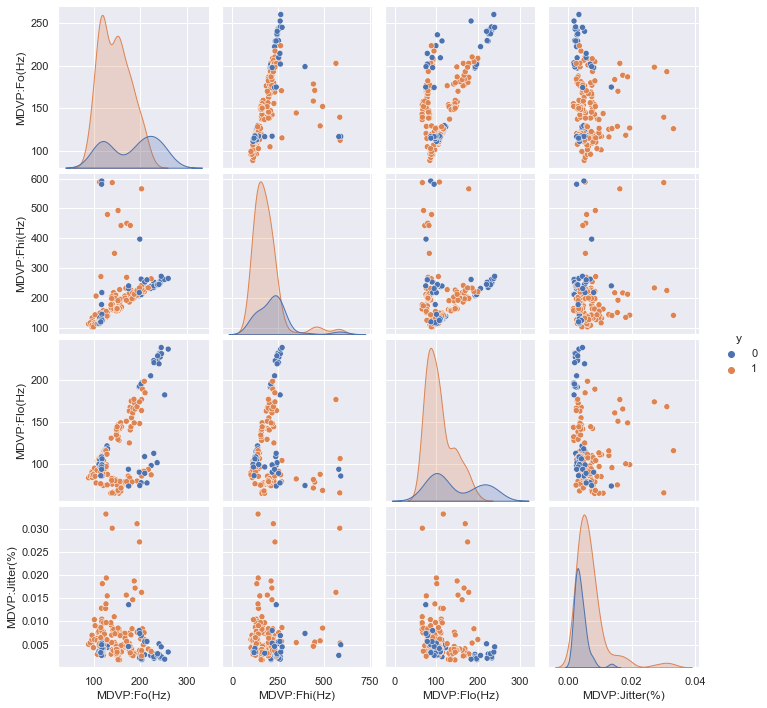

In [9]:
# plotting the scatter matrix for first few features

dataNew = data.iloc[:,1:5]
dataNew['y'] = y
sns.pairplot(dataNew, hue='y');

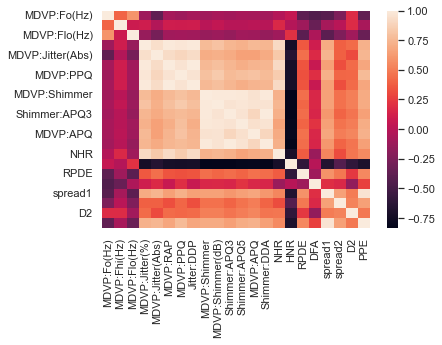

In [10]:
# Let's take a look that Pearson's Correlation Coefficient among the features
# Value of 1 implies they are highly positively correlated and 0 means no correlation
# and value of -1 implies they are highly negatively correlated

corr = X.corr()
sns.heatmap(corr);

In [11]:
# we see note the following from the correlation matrix
# 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP' are highly correlated with 'MDVP:Jitter(%)'
# 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ','Shimmer:DDA' are highly correlated with 'MVDP:Shimmer'
# 'spread1' is also highly correlated with 'PPE'

# hence these features can be dropped as they contain reductant information

X = X.drop(['MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
          'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ',
          'Shimmer:DDA', 'spread1'], axis=1)

In [12]:
X.shape

(195, 12)

In [13]:
# thus 22 features is reduced to 12 features

In [14]:
# Since this is a medical diagnosis model, so accuracy is not a perfect metric to qualify the model
# we don't want to classify any postive case as negative so we need a high recall(sensitivity) score with some tolerance
# allowed in precision score

In [15]:
# for model selection we check the senstivity score for few classification models over 'n' iterations 
# and calculate the mean, from that choose the model which give high average sensitivity score

In [16]:
# importing some classifier models

from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

models = [GaussianNB(), SVC(), DecisionTreeClassifier(), RandomForestClassifier(), LogisticRegression()]

In [17]:
# for getting nearly equal proportions from each class in training and testing set
# we use Stratified Shuffle from scikit-learn

from sklearn.model_selection import StratifiedShuffleSplit

# also to measure the sensitivity (recall) score we import the following

from sklearn.metrics import recall_score

In [18]:
# let's define a function which takes in models, data and gives out mean accuray score for each model

def model_selection(models, X, y, n):
    total_score = []

    for iteration in range(n):

        rs = np.random.randint(100)
        sss = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=rs)

        for train_index, test_index in sss.split(X,y):

            Xtrain = np.array([X.iloc[i] for i in train_index])
            ytrain = np.array([y.iloc[i] for i in train_index])
            Xtest = np.array([X.iloc[i] for i in test_index])
            ytest = np.array([y.iloc[i] for i in test_index])

        score = []
        for model in models:

            model.fit(Xtrain, ytrain)
            ypred = model.predict(Xtest)
            score.append(recall_score(ytest, ypred))

        total_score.append(score)
    
    total_score = np.array(total_score)
    return total_score

In [19]:
# let's take a look at the mean recall for each model

total_recall_score = model_selection(models, X, y, 20)

mean_recall = total_recall_score.mean(axis=0)
mean_recall

array([0.74324324, 0.99054054, 0.89459459, 0.96621622, 0.92972973])

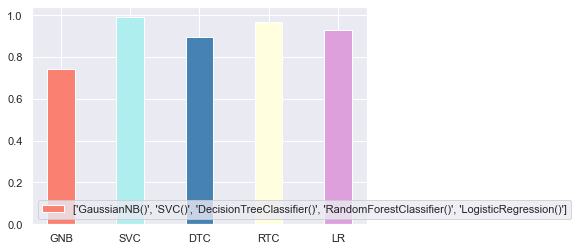

In [20]:
# let's plot the bar graph for each models with their mean sensitivity
# note that sensitivity and recall mean the same

model_names = [str(model) for model in models]
ticks = ['GNB','SVC','DTC','RTC','LR']
colors = ['salmon', 'paleturquoise', 'steelblue', 'lightyellow', 'plum']
plt.bar(ticks, mean_recall, width=0.4, label=model_names, color = colors)
plt.rcParams['legend.loc'] = 'lower left'
plt.legend();

In [21]:
# we see that Support Vector Classifier does a better job, so we're going to use that to implement our model
# we need to tune the hyperparameters as to get the model to our desired operation

In [22]:
# following are the hyperparameters we're going to run our analysis from which we will choose 
# the one pair that does the better job

C_vals = [0.1, 1, 5, 10, 100, 1000]
gamma_vals = [1, 0.1, 0.5, 0.01, 0.001, 0.0001]

In [23]:
# Now, if we use the same technique to tune the hyperparameters, it would result in the model having high sensitivity
# and zero precision, it would classify everyone as diagnosed with parkinsons' disease
# we can check that as follows

In [24]:
def hyperparameter_selection(X, y, C_vals, gamma_vals, n):
    
    total_score = []
    
    for iteration in range(n):
        rs = np.random.randint(100)
        sss = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=rs)

        for train_index, test_index in sss.split(X,y):
            Xtrain = np.array([X.iloc[i] for i in train_index])
            ytrain = np.array([y.iloc[i] for i in train_index])
            Xtest = np.array([X.iloc[i] for i in test_index])
            ytest = np.array([y.iloc[i] for i in test_index])
        
        score = []
        for C in C_vals:
            for gamma in gamma_vals:
                model = SVC(kernel='rbf', C=C, gamma=gamma)
                ypred = model.fit(Xtrain, ytrain).predict(Xtest)
                recall = recall_score(ytest, ypred)
                score.append(recall)
                
        total_score.append(score)
        
    total_score = np.array(total_score)
    
    return total_score

In [25]:
total_score = hyperparameter_selection(X, y, C_vals, gamma_vals, 10)
mean_recall_hp = np.mean(total_score, axis=0)

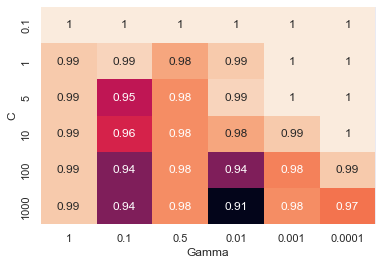

In [26]:
mean_recall_hp = mean_recall_hp.reshape(6,6)
sns.heatmap(mean_recall_hp, annot=True, xticklabels=gamma_vals, yticklabels=C_vals, cbar=False)
plt.xlabel('Gamma')
plt.ylabel('C');

In [27]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=26)

for train_index, test_index in sss.split(X,y):
    Xtrain = np.array([X.iloc[i] for i in train_index])
    ytrain = np.array([y.iloc[i] for i in train_index])
    Xtest = np.array([X.iloc[i] for i in test_index])
    ytest = np.array([y.iloc[i] for i in test_index])

In [28]:
svc = SVC(kernel='rbf', C=0.1, gamma=1)
svc.fit(Xtrain, ytrain)

SVC(C=0.1, gamma=1)

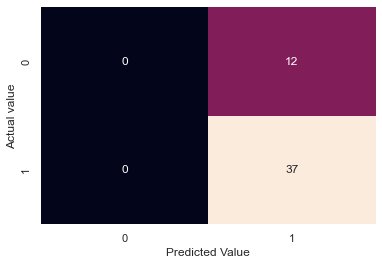

In [29]:
ypred = svc.predict(Xtest)

con_mat = confusion_matrix(ytest, ypred)
sns.heatmap(con_mat, annot=True, cbar=False)
plt.xlabel('Predicted Value')
plt.ylabel('Actual value');

In [30]:
# as we can see that model classifies every sample as being diagnosed with parkinson's disease

In [31]:
# a better option would be to opt for F-beta score with beta > 1 as to high more importane to recall than precision

from sklearn.metrics import fbeta_score

def modified_hyperparameter(X, y, C_vals, gamma_vals, n):
    
    total_score = []
    
    for iteration in range(n):
        rs = np.random.randint(100)
        sss = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=rs)

        for train_index, test_index in sss.split(X,y):
            Xtrain = np.array([X.iloc[i] for i in train_index])
            ytrain = np.array([y.iloc[i] for i in train_index])
            Xtest = np.array([X.iloc[i] for i in test_index])
            ytest = np.array([y.iloc[i] for i in test_index])
        
        score = []
        for C in C_vals:
            for gamma in gamma_vals:
                model = SVC(kernel='rbf', C=C, gamma=gamma)
                ypred = model.fit(Xtrain, ytrain).predict(Xtest)
                fbeta = fbeta_score(ytest, ypred, beta=1)
                score.append(fbeta)
                
        total_score.append(score)
        
    total_score = np.array(total_score)
    
    return total_score

In [32]:
modified_total_score = modified_hyperparameter(X, y, C_vals, gamma_vals, 10)
mean_fbeta = np.mean(modified_total_score, axis=0)

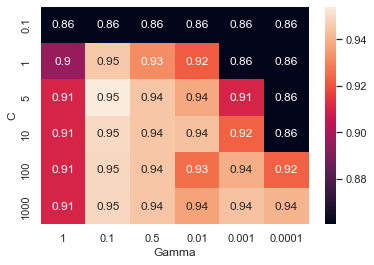

In [33]:
mean_fbeta = mean_fbeta.reshape(6,6)
sns.heatmap(mean_fbeta, annot=True, xticklabels=gamma_vals, yticklabels=C_vals)
plt.xlabel('Gamma')
plt.ylabel('C');

In [34]:
mean_fbeta

array([[0.86046512, 0.86046512, 0.86046512, 0.86046512, 0.86046512,
        0.86046512],
       [0.8959681 , 0.94546831, 0.93210099, 0.92217645, 0.86046512,
        0.86046512],
       [0.91021715, 0.95404704, 0.94483488, 0.93796014, 0.91042787,
        0.86046512],
       [0.91021715, 0.94936376, 0.94483488, 0.94381114, 0.92299178,
        0.86046512],
       [0.91021715, 0.94925786, 0.94483488, 0.92583904, 0.93934818,
        0.92299178],
       [0.91021715, 0.94925786, 0.94483488, 0.93656854, 0.94404981,
        0.94074941]])

In [35]:
# So we see that C=5, gamma=0.5 seems to be the best hyperparameter for our model to work as we wish it to be

svc_mod = SVC(kernel='rbf', C=5, gamma=0.5)
svc_mod.fit(Xtrain, ytrain)

SVC(C=5, gamma=0.5)

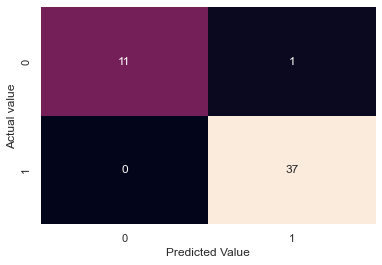

In [36]:
ypred_mod = svc_mod.predict(Xtest)

con_mat_mod = confusion_matrix(ytest, ypred_mod)
sns.heatmap(con_mat_mod, annot=True, cbar=False)
plt.xlabel('Predicted Value')
plt.ylabel('Actual value');

In [37]:
# let's look at the classification report 

from sklearn.metrics import classification_report

print(classification_report(ytest, ypred_mod))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.97      1.00      0.99        37

    accuracy                           0.98        49
   macro avg       0.99      0.96      0.97        49
weighted avg       0.98      0.98      0.98        49

